In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-1377d4c1-7d60-15b8-ed77-c2280a62b2f1)


# Casting Dataset

In [60]:
import os
import keras
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
main_dir = '/content/drive/MyDrive/Major Project/casting_dataset'

In [ ]:
train_dir = os.path.join(main_dir, 'train')

categories = ['def_front', 'ok_front']

X_data = []
Y_data = []

count = 0
for idx, category in enumerate(categories):
    
    images_dir = os.path.join(train_dir, category)

    for image in os.listdir(images_dir):

        image_path = os.path.join(images_dir, image)

        image = cv2.imread(image_path)
        
        image = image/ 255.0

        X_data.append(image)
        
        count +=1
        print(count)
    
    Y_data += [idx] * len(X_data)


In [ ]:
X_data = np.array(X_data)
Y_data = np.array(Y_data)

In [ ]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(X_data, Y_data, test_size=0.1, shuffle=True)

In [ ]:
from keras.applications.resnet50 import ResNet50

model = ResNet50(include_top=True,
                 weights=None,
                 input_shape = (300,300,3), 
                 classes=2)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

In [ ]:
history = model.fit(train_x, train_y,
                    batch_size = 32,
                    validation_data = (val_x, val_y),
                    validation_steps = 32,
                    epochs = 50,
                    verbose = 1,
                    callbacks = [keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr = 1e-8)]
                    )

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

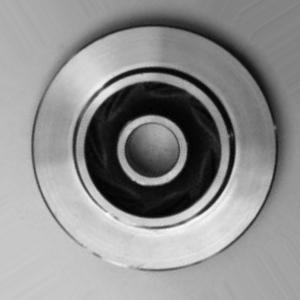

1/1 [==============================] - 0s 28ms/step
[[0. 1.]]
ok_front


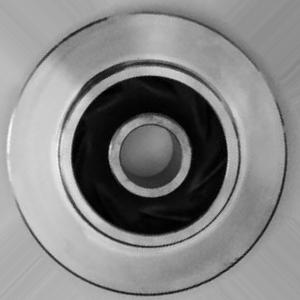

1/1 [==============================] - 0s 27ms/step
[[0. 1.]]
ok_front


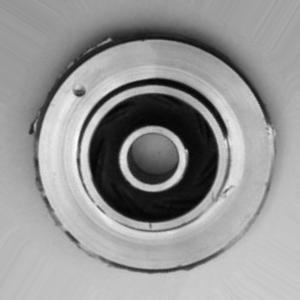

1/1 [==============================] - 0s 28ms/step
[[0. 1.]]
ok_front


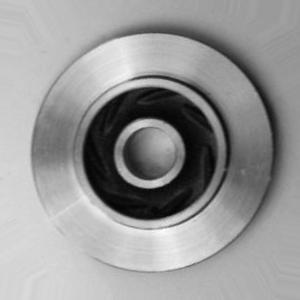

1/1 [==============================] - 0s 28ms/step
[[0. 1.]]
ok_front


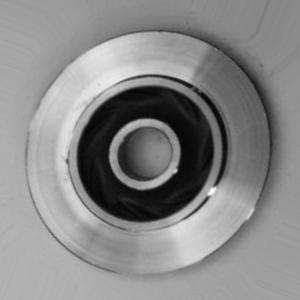

1/1 [==============================] - 0s 28ms/step
[[0. 1.]]
ok_front


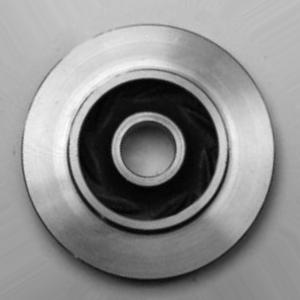

1/1 [==============================] - 0s 30ms/step
[[0. 1.]]
ok_front


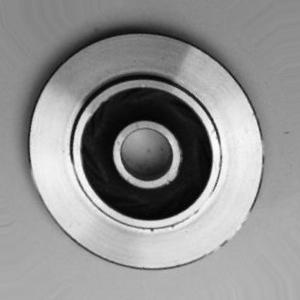

1/1 [==============================] - 0s 30ms/step
[[0. 1.]]
ok_front


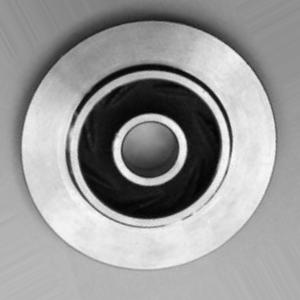

1/1 [==============================] - 0s 29ms/step
[[0. 1.]]
ok_front


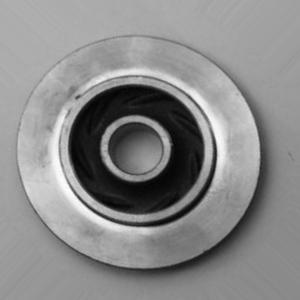

1/1 [==============================] - 0s 27ms/step
[[0. 1.]]
ok_front


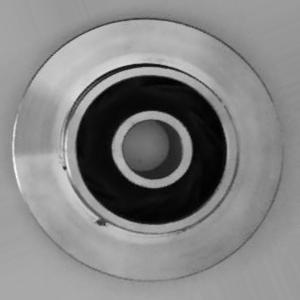

1/1 [==============================] - 0s 28ms/step
[[0. 1.]]
ok_front


In [61]:
test_dir = os.path.join(main_dir, 'test')

defective_imgs = [os.path.join(test_dir,'def_front',i) for i in os.listdir( os.path.join( test_dir, 'def_front') )]
non_defective_imgs = [os.path.join(test_dir,'ok_front',i) for i in os.listdir( os.path.join( test_dir, 'ok_front') )]

test_images = defective_imgs + non_defective_imgs

random.shuffle(test_images)
number_of_tests = 10

idx_to_category = {0:'def_front', 1:'ok_front'}

for idx in range(number_of_tests):
    test_image = cv2.imread(os.path.join(test_dir, test_images[idx]))
    cv2_imshow(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image, verbose=1)
    print(result)
    result = np.argmax(result[0])
    print(idx_to_category[int(result)])

In [ ]:
# get test accuracy
# save model with documentation
# upload other datasets

In [38]:
train_dir = os.path.join(main_dir, 'train')

categories = ['def_front', 'ok_front']

all_files = [os.path.join(category, image) for category in categories for image in os.listdir(os.path.join(train_dir, category))]

random.shuffle(all_files)

split_ratio = 0.1

train_files = all_files[ int(split_ratio * len(all_files)) : ]

val_files = all_files[ : int(split_ratio * len(all_files)) ]

def dataloader(train_dir, files, batch_size=32):

    while True:

        n=0

        X_data = []
        Y_data = []

        for img in files:

            image_path = os.path.join(train_dir, img)
            image = cv2.imread(image_path)
                
            image = image/ 255.0

            X_data.append(image)
            
            if 'def_front' in img:
                #Y_data.append(0.0)

                Y_data.append( keras.utils.to_categorical([0], num_classes=2)[0] )

            
            if 'ok_front' in img:
                #Y_data.append(1.0)
            
                Y_data.append( keras.utils.to_categorical([1], num_classes=2)[0] )
            n += 1

            if n == batch_size:

                
                yield ( np.array(X_data, dtype='float64') , np.array(Y_data, dtype='float64'))
            
                n = 0

                X_data, Y_data = [], []

In [63]:
batch_size = 64

train_dataloader = dataloader(train_dir, train_files, batch_size = batch_size)
val_dataloader = dataloader(train_dir, val_files, batch_size = batch_size)

In [64]:
data = next(train_dataloader)
print(data[0].shape)
print(data[1].shape)

(64, 300, 300, 3)
(64, 2)


In [65]:
from keras.applications.resnet50 import ResNet50

model = ResNet50(include_top=True,
                 weights=None,
                 input_shape = (300,300,3), 
                 classes=2)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
history = model.fit_generator(train_dataloader,
                    validation_data = val_dataloader,
                    steps_per_epoch = len(train_files) // batch_size,
                    validation_steps = len(val_files)// batch_size,
                    epochs = 50,
                    verbose = 1,
                    callbacks = [keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr = 1e-8)]
                    )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
31/91 [=========>....................] - ETA: 1:08 - loss: 1.4518 - accuracy: 0.6945

In [51]:
model

# Solar Panels Dataset

In [ ]:
import os
import keras
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Steel Defect Dataset

In [ ]:
import os
import keras
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Surface Defect Dataset

In [ ]:
import os
import keras
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Welding Defect Dataset

In [ ]:
import os
import keras
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt